## Sentiment Analysis

#### import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_csv('../merged_df/merged_df.csv', sep=",", index_col=0)

In [3]:
df_text=pd.read_csv('data/textual/df_text_eda.csv', sep=",", index_col=0 )

In [4]:
df_text.head(2)

,url,title,date,author,description,text,Article Length
0,https://www.cnbc.com/select/best-balance-trans...,11 best balance transfer cards with 0% APR of ...,2019-10-15 05:00:00+00:00,"Jason Stauffer,Brett Holzhauer",We analyzed 101 balance transfer cards using a...,Who's this for: The Citi Simplicity® Card has ...,1133
1,https://www.cnbc.com/select/the-best-credit-ca...,The best credit cards for building credit of J...,2019-10-29 15:24:00+00:00,"Benji Stawski,Alexandria White",We analyzed 29 credit cards that are marketed ...,If you lack a credit history or have poor cred...,1468


In [5]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9770 entries, 0 to 10002
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   url             9770 non-null   object
 1   title           9770 non-null   object
 2   date            9770 non-null   object
 3   author          9565 non-null   object
 4   description     9746 non-null   object
 5   text            9770 non-null   object
 6   Article Length  9770 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 610.6+ KB


#### Only use articles that mention the given ticker and stock market 

In [6]:
import pandas as pd

# only use articles that mention the given ticker and stock market 
keywords = '''
TSLA|Tesla|Elon Musk|Model S|Cybertruck|
AAPL|Apple|Tim Cook|iPhone|Mac|
MSFT|Microsoft|Satya Nadella|Windows|Azure|
GOOG|Google|Sundar Pichai|Android|AdSense|
AMZN|Amazon|Andy Jassy|Prime|AWS|
Shares|Dividend|Earnings|IPO|Buyback|Financial Results|Quarterly Report|SEC Filings|Stock Split|Market Cap|Trading Volume|
Merger|Acquisition|Partnership|Innovation|Patent|Lawsuit|Regulation|Stock|Option
'''

# Filter articles based on keywords, case-insensitive
df = df_text[df_text['text'].str.contains(keywords, case=False, na=False)]

df.head(), len(df)


(                                                  url  \
 1   https://www.cnbc.com/select/the-best-credit-ca...   
 4   https://www.cnbc.com/select/best-credit-card-s...   
 6   https://www.cnbc.com/select/best-brick-mortar-...   
 7   https://www.cnbc.com/select/best-high-yield-sa...   
 10  https://www.cnbc.com/select/best-loans-for-ref...   
 
                                                 title  \
 1   The best credit cards for building credit of J...   
 4   The best credit card sign-up bonuses of Januar...   
 6   Best brick-and-mortar checking accounts of Jan...   
 7   The best high-yield savings accounts of Januar...   
 10  Here are the best loans for refinancing credit...   
 
                          date  \
 1   2019-10-29 15:24:00+00:00   
 4   2019-11-12 19:30:46+00:00   
 6   2020-12-23 14:00:02+00:00   
 7   2020-05-06 13:54:54+00:00   
 10  2021-01-14 15:16:52+00:00   
 
                                              author  \
 1                    Benji Stawski,Al

## bert-base-multilingual-uncased-sentiment

In [7]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load model and tokenizer
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)



C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
import torch

def analyze_sentiment(text):
    # Tokenize and prepare the input
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)

    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the predicted sentiment
    sentiment_scores = outputs.logits
    predicted_class = torch.argmax(sentiment_scores, dim=1).item()

    # Return the sentiment as a numeric value from 1 to 5
    sentiment_value = predicted_class + 1  # To convert zero-indexed to 1-indexed

    return sentiment_value


In [9]:
# Add a new column for sentiment analysis results
df["sentiment"] = df["text"].apply(analyze_sentiment)

C:\Users\ethan\AppData\Local\Temp\ipykernel_20476\1673758664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment"] = df["text"].apply(analyze_sentiment)


In [11]:
df

,url,title,date,author,description,text,Article Length,sentiment
1,https://www.cnbc.com/select/the-best-credit-ca...,The best credit cards for building credit of J...,2019-10-29 15:24:00+00:00,"Benji Stawski,Alexandria White",We analyzed 29 credit cards that are marketed ...,If you lack a credit history or have poor cred...,1468,4
4,https://www.cnbc.com/select/best-credit-card-s...,The best credit card sign-up bonuses of Januar...,2019-11-12 19:30:46+00:00,"Elizabeth Gravier,Alexandria White",We analyzed the most popular credit cards avai...,Terms apply to American Express benefits and o...,1848,4
6,https://www.cnbc.com/select/best-brick-mortar-...,Best brick-and-mortar checking accounts of Jan...,2020-12-23 14:00:02+00:00,Alexandria White,These brick-and-mortar checking accounts are F...,Editor's Note: APYs listed in this article are...,299,4
7,https://www.cnbc.com/select/best-high-yield-sa...,The best high-yield savings accounts of Januar...,2020-05-06 13:54:54+00:00,"Benji Stawski,Brett Holzhauer,Elizabeth Gravier",We rounded up the top nine high-yield savings ...,Who's this for? The LendingClub High-Yield Sav...,2155,5
10,https://www.cnbc.com/select/best-loans-for-ref...,Here are the best loans for refinancing credit...,2021-01-14 15:16:52+00:00,Megan DeMatteo,CNBC Select rounded up the top personal loans ...,"Credit card debt is common, but paying high in...",1932,3
...,...,...,...,...,...,...,...,...
9996,https://www.cnbc.com/2022/09/22/despite-fears-...,Nearly 6 in 10 donors may give more to charity...,2022-09-22 18:48:20+00:00,"Kate Dore, CFP®","Despite economic uncertainty, some donors may ...","With lingering high inflation, stock market vo...",223,2
9998,https://www.cnbc.com/2023/08/14/prepare-for-vo...,"Don’t be ‘complacent’ about volatility, warns ...",2023-08-14 16:33:35+00:00,"Kate Dore, CFP®",Even if there's a soft landing for the economy...,Glassman said it's possible the soft landing m...,256,3
9999,https://www.cnbc.com/2021/11/20/4-year-end-mov...,4 year-end moves to slash your cryptocurrency ...,2021-11-20 14:00:01+00:00,"Kate Dore, CFP®","As the year end approaches, there are still wa...",One of the biggest challenges for cryptocurren...,542,1
10000,https://www.cnbc.com/2021/10/29/build-back-bet...,Build Back Better Act would close tax loophole...,2021-10-29 16:37:29+00:00,Greg Iacurci,"Bitcoin, ethereum, dogecoin and other cryptocu...",Proposed legislation unveiled Thursday as part...,222,1


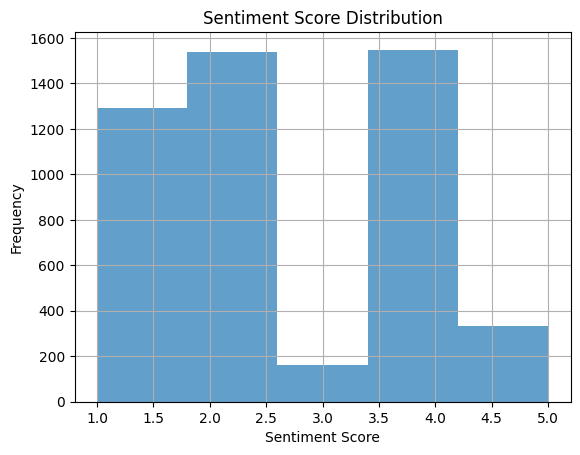

In [13]:
import matplotlib.pyplot as plt

# Create a histogram to visualize the distribution of sentiment scores
df["sentiment"].hist(bins=5, alpha=0.7)
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


#### Sentiment Labels

In [21]:
sentiment_labels = ["very negative", "negative", "neutral", "positive", "very positive"]

# Function to get the sentiment label based on the sentiment score
def get_sentiment_label(score):
    # Since the sentiment_scores are 1-based and sentiment_labels are zero-based
    return sentiment_labels[score - 1]

# Add a new column for the sentiment labels
df["sentiment_label"] = df["sentiment"].apply(get_sentiment_label)




C:\Users\ethan\AppData\Local\Temp\ipykernel_20476\1386082695.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment_label"] = df["sentiment"].apply(get_sentiment_label)


In [16]:
df.to_csv('data/textual/df_text_sentiment.csv')

### EDA

In [22]:
df

,url,title,date,author,description,text,Article Length,sentiment,sentiment_label
1,https://www.cnbc.com/select/the-best-credit-ca...,The best credit cards for building credit of J...,2019-10-29 15:24:00+00:00,"Benji Stawski,Alexandria White",We analyzed 29 credit cards that are marketed ...,If you lack a credit history or have poor cred...,1468,4,positive
4,https://www.cnbc.com/select/best-credit-card-s...,The best credit card sign-up bonuses of Januar...,2019-11-12 19:30:46+00:00,"Elizabeth Gravier,Alexandria White",We analyzed the most popular credit cards avai...,Terms apply to American Express benefits and o...,1848,4,positive
6,https://www.cnbc.com/select/best-brick-mortar-...,Best brick-and-mortar checking accounts of Jan...,2020-12-23 14:00:02+00:00,Alexandria White,These brick-and-mortar checking accounts are F...,Editor's Note: APYs listed in this article are...,299,4,positive
7,https://www.cnbc.com/select/best-high-yield-sa...,The best high-yield savings accounts of Januar...,2020-05-06 13:54:54+00:00,"Benji Stawski,Brett Holzhauer,Elizabeth Gravier",We rounded up the top nine high-yield savings ...,Who's this for? The LendingClub High-Yield Sav...,2155,5,very positive
10,https://www.cnbc.com/select/best-loans-for-ref...,Here are the best loans for refinancing credit...,2021-01-14 15:16:52+00:00,Megan DeMatteo,CNBC Select rounded up the top personal loans ...,"Credit card debt is common, but paying high in...",1932,3,neutral
...,...,...,...,...,...,...,...,...,...
9996,https://www.cnbc.com/2022/09/22/despite-fears-...,Nearly 6 in 10 donors may give more to charity...,2022-09-22 18:48:20+00:00,"Kate Dore, CFP®","Despite economic uncertainty, some donors may ...","With lingering high inflation, stock market vo...",223,2,negative
9998,https://www.cnbc.com/2023/08/14/prepare-for-vo...,"Don’t be ‘complacent’ about volatility, warns ...",2023-08-14 16:33:35+00:00,"Kate Dore, CFP®",Even if there's a soft landing for the economy...,Glassman said it's possible the soft landing m...,256,3,neutral
9999,https://www.cnbc.com/2021/11/20/4-year-end-mov...,4 year-end moves to slash your cryptocurrency ...,2021-11-20 14:00:01+00:00,"Kate Dore, CFP®","As the year end approaches, there are still wa...",One of the biggest challenges for cryptocurren...,542,1,very negative
10000,https://www.cnbc.com/2021/10/29/build-back-bet...,Build Back Better Act would close tax loophole...,2021-10-29 16:37:29+00:00,Greg Iacurci,"Bitcoin, ethereum, dogecoin and other cryptocu...",Proposed legislation unveiled Thursday as part...,222,1,very negative


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4875 entries, 1 to 10002
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   url              4875 non-null   object
 1   title            4875 non-null   object
 2   date             4875 non-null   object
 3   author           4752 non-null   object
 4   description      4863 non-null   object
 5   text             4875 non-null   object
 6   Article Length   4875 non-null   int64 
 7   sentiment        4875 non-null   int64 
 8   sentiment_label  4875 non-null   object
dtypes: int64(2), object(7)
memory usage: 380.9+ KB


In [26]:
# Create a month-year column for aggregation
df_text['Month-Year'] = df['date'].dt.to_period('M')

# Calculate the count of each sentiment category by month
sentiment_over_time = df.groupby(['Month-Year', 'sentiment_label']).size().unstack(fill_value=0)

sentiment_proportions = sentiment_over_time.div(sentiment_over_time.sum(axis=1), axis=0)

import matplotlib.pyplot as plt

sentiment_over_time.plot(kind='line', figsize=(10, 6))
plt.title('Sentiment Count Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Adjust layout
plt.show()



C:\Users\ethan\AppData\Local\Temp\ipykernel_20476\1706944319.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_text['Month-Year'] = df['date'].dt.to_period('M')


KeyError: 'Month-Year'

In [ ]:
# Plot the sentiment distribution as a pie chart
plt.figure(figsize=(6, 6))
labels = sentiment_distribution.index
sizes = sentiment_distribution.values
colors = ['green', 'red', 'gray']  # You can choose different colors for the pie slices
explode = (0.1, 0.1, 0.1)  # To explode the slices if needed

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title("Sentiment Distribution")

# Display the pie chart
plt.show()